### Nominal/OHE Encoding
One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using one hot encoding as follows:

1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [11]:
## Create a dataframe
df = pd.DataFrame({
    'color' : ['red','blue','green','green','red','blue']
})
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [12]:
## create the object for the class one hot encoder 
encoder = OneHotEncoder()


In [13]:
encoded = encoder.fit_transform(df[['color']]).toarray()   ## Here the color get sorted into alphabetic order and then get convert
## that's why we see the one at last in the first row 
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [14]:
import pandas as pd
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [ ]:
encoder.transform([['blue']]).toarray()  ## getting to one hot encoder for the new data     

c:\Users\sakth\OneDrive\Desktop\ml_saga\saga\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [16]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [17]:
import seaborn as sns
df1 = sns.load_dataset('tips')
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
print(df1['smoker'].unique())
print(df1['day'].unique())
print(df1['time'].unique())

['No', 'Yes']
Categories (2, object): ['Yes', 'No']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [19]:
df2 = df1.copy

In [21]:
df1['smoker'] = encoder.fit_transform(df1[['smoker']]).toarray()

In [22]:
df1['smoker']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
239    1.0
240    0.0
241    0.0
242    1.0
243    1.0
Name: smoker, Length: 244, dtype: float64

In [33]:
df1.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,1.0,1.0,Dinner,2


In [27]:
df1['day'] = encoder.fit_transform(df1[['day']]).toarray()
df1['day'].tail()

239    1.0
240    1.0
241    1.0
242    1.0
243    1.0
Name: day, dtype: float64

In [32]:
df1['sex'] = encoder.fit_transform(df1[['sex']]).toarray()
df1['sex']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
239    1.0
240    0.0
241    1.0
242    1.0
243    0.0
Name: sex, Length: 244, dtype: float64

In [36]:
df1['time'] = encoder.fit_transform(df1[['time']]).toarray() 
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,1.0,1.0,0.0,2
1,10.34,1.66,1.0,1.0,1.0,0.0,3
2,21.01,3.50,1.0,1.0,1.0,0.0,3
3,23.68,3.31,1.0,1.0,1.0,0.0,2
4,24.59,3.61,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1.0,1.0,1.0,0.0,3
240,27.18,2.00,0.0,0.0,1.0,0.0,2
241,22.67,2.00,1.0,0.0,1.0,0.0,2
242,17.82,1.75,1.0,1.0,1.0,0.0,2


In [37]:
df1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [51]:
df1.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'total_bill_change'],
      dtype='object')

total_bill  :High skew
tip  :High skew
sex  : mild skew
smoker  : Approximately normal
day  :High skew
time  : mild skew
size  :High skew
total_bill_change  : Approximately normal


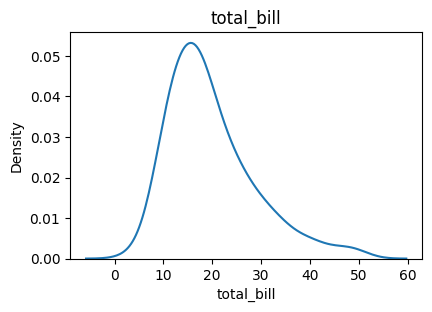

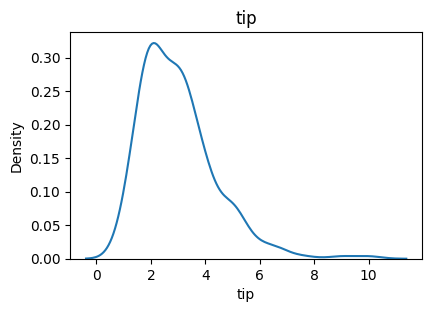

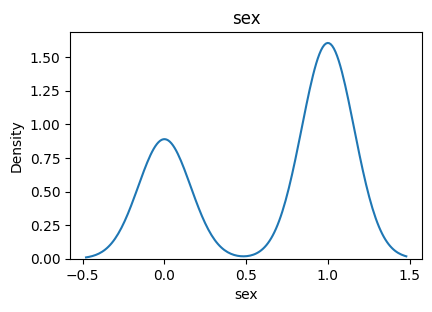

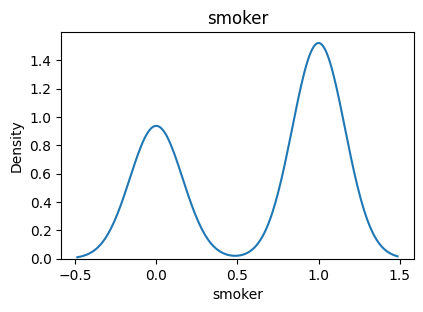

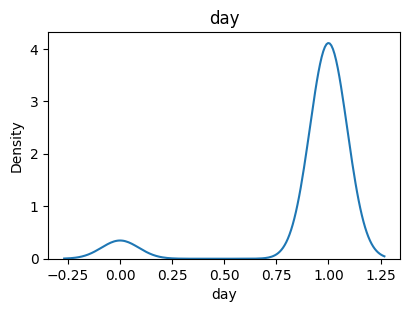

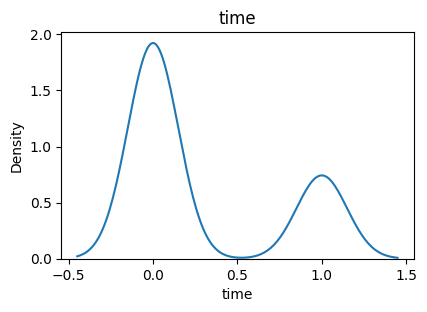

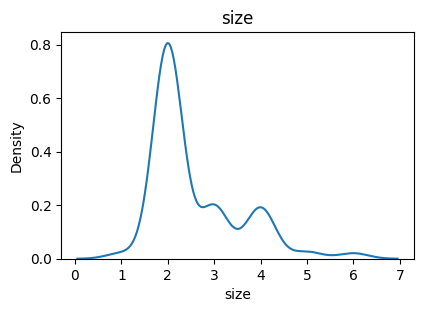

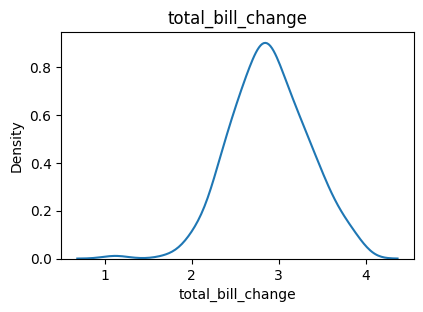

In [54]:
import matplotlib.pyplot as plt
from scipy.stats import skew
lst = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size','total_bill_change']

for i in lst:
    skew_value = skew(df1[i])
    if abs(skew_value) < 0.5:
        print(i," : Approximately normal")
    elif abs(skew_value) < 1:
         print(i,' : mild skew')
    else:
        print(i," :High skew")
    k = 1
    plt.figure(figsize=(10,10))
    plt.subplot(3,2,k)
    plt.title(i)
    sns.kdeplot(df1[i])
    k = k + 1

<Axes: xlabel='total_bill_change', ylabel='Density'>

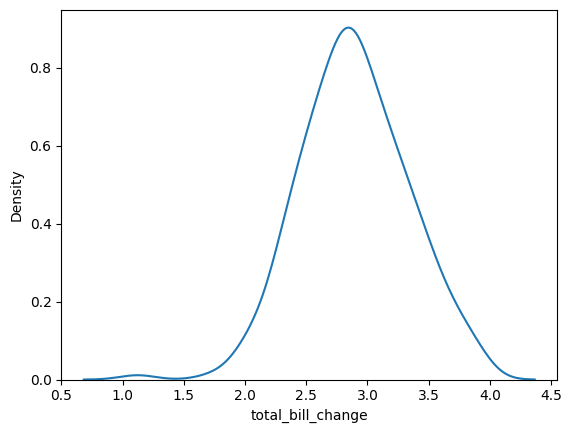

In [53]:
import numpy as np
df1['total_bill_change'] = np.log(df1['total_bill']) 
sns.kdeplot(df1['total_bill_change'])